In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from Models import models
import numpy as np
import tensorflow as tf
from Visuals.plotting_functions import plot_graphs

Test 1
GRU ->
Linear -> 
Sigmoid


In [2]:
#to plot loss over time 



In [3]:
tweets = list()
targets = list()

with open('../preprocessing_scripts/new_train_data.txt', 'r') as f:
  tweets = f.readlines()
print(len(tweets))

with open('../preprocessing_scripts/targets.csv', 'r') as f:
  targets = f.readlines()
targets2 = list()
for i in range(0, len(targets)): 
    targets2.append(int(targets[i]))
targets = targets2

7613


In [4]:


max_words = 14000
tokenizer = Tokenizer(num_words=max_words)


In [5]:
trainX = tweets[:6000]
trainY = targets[:6000]

testX = tweets[6000:]
testY = tweets[6000:]

maxlen = 100

from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer.fit_on_texts(trainX)
tokenized_version = tokenizer.texts_to_sequences(trainX)
tokenized_version = pad_sequences(tokenized_version, maxlen=maxlen)
print(tokenized_version)

[[   0    0    0 ...  165   58    1]
 [   0    0    0 ...   84   15    1]
 [   0    0    0 ...   33 1064    1]
 ...
 [   0    0    0 ...   10 2164    1]
 [   0    0    0 ...    8  682    1]
 [   0    0    0 ...  866 3316    1]]


In [6]:
vocab_size = 14000
model = models.NaiveModel(vocab_size)
es = EarlyStopping(patience=5)
model.compile(loss="binary_crossentropy",
              optimizer="nadam",
              metrics=['accuracy']) 

In [7]:
trainY = np.array(trainY)
history = model.fit(x=tokenized_version, y=trainY, batch_size = 32, epochs=10, validation_split = 0.2,callbacks=[es])

Train on 4800 samples, validate on 1200 samples
Epoch 1/10
4800/4800 [==============================] - 37s 8ms/sample - loss: 0.5679 - accuracy: 0.7088 - val_loss: 0.5946 - val_accuracy: 0.7083

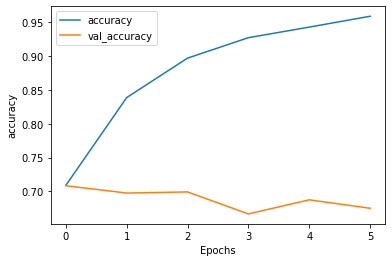

In [8]:
plot_graphs(history,"accuracy")

